# SUPPLY CHAIN MANAGEMENT

## PROBLEM OVERVIEW :


A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two years back. Their higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country.

## GOALS :


The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that I take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it using Test dataset .

## DATA DICTIONARY :


Ware_house_ID -  Unique Warehouse id where product is prepared for dispatch, dtype: Object

WH_Manager_ID - Manager Id present in the warehouse, dtype: Object.

zone - Zone of the Warehouse, dtype: String

WH_regional_zone - Regional Zone of the warehouse, dtype:Object

num_refill_req_l3m - Refilling request received by the warehouse in the last 3 months, dtype: integer.

transport_issue_l1y - No. of transport issued for warehouse in last 1 year, dtype: integer.

Competitor_in_mkt - No. of competitors in the market, dtype:integer.

retail_shop_num - Number of retail shops who sell noodles produced by the warehouse, dtype: integer.

wh_owner_type - The warehouse is owned by the company or it is on rent, dtype: String.

distributor_num - No. of distributor who works between warehouse and retail shops, dtype: integer.

flood_impacted - Is the warehouse in a flood impacted area or not, dtype: integer.

flood_proof - Flood_proof: Warehouse is having flood proof indicator, dtype: integer.

electric_supply - Does the warehouse have proper electric supply along with some power backup, dtype:integer.

dist_from_hub - distance from the warehouse to production hub, dtype: integer.

workers_num - no. workers in the warehouse, dtype: integer.

wh_est_year - warehouse establishment year, dtype: integer.

storage_issue_reported_l3m - storage issues reported by the warehouse in the last 3months.

temp_reg_mach - warehouse having temperature regulating machine indicator or not, dtype: integer.

approved_wh_govt_certificate - Type of approval warehouse having been issued by government, dtype: Object.

wh_breakdown_l3m - Number of times the warehouse faces the breakdown in the last 3 months, dtype:integer.

product_wg_ton - Product weight, dtype: integer.

## IMPORTING LIBRARIES :


In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## LOADING DATASET :

In [363]:
#loading the training datasets
train_data=pd.read_csv('C:/Users/shahana/Desktop/entri app/supply_train.csv')
train_data


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [364]:
#loading the validation data sets
val_data=pd.read_csv('C:/Users/shahana/Desktop/entri app/supply_test.csv')
val_data

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


## INITIAL EXPLORATION :

In [365]:
train_data.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


Here, i have loaded the dataset into a Pandas DataFrame and displaying the initial rows to get a sense of the data's structure.

In [366]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [367]:
train_data.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [368]:
train_data.shape

(16620, 25)

In [369]:
train_data.dtypes

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


In [370]:
train_data.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

After loading the dataset in and from the head of supply_train dataset i can see a number of things. These 25 columns provide a very rich amount of information for deep data exploration which i can do on this dataset. I do already see some missing values, (which will require cleaning), handling of NaN values and some unwanted columns (which can be removed).


## DATA CLEANING

In [371]:
train_data.duplicated().sum()   #checking if there is any duplicates

0

In [372]:
train_data.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [373]:
train_data.drop(['Unnamed: 0','wh_est_year'], axis=1, inplace=True)   #removing unnecessary columns

In [374]:
train_data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [375]:
train_data_cleaned=train_data.dropna(subset=['workers_num','approved_wh_govt_certificate'])    
#removing NaN values in columns 'workers_num','approved_wh_govt_certificate'


In [376]:
train_data_cleaned.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [377]:
train_data_cleaned.shape

(15374, 23)

from above steps, i understood there is no duplicates in data and found null values in columns workers_num (4%), wh_est_year (47%) and approved_wh_govt_certificate (3%). i thaught of handling this by dropping rows with null values in columns  workers_num and approved_wh_govt_certificate as it contains only less percentage of data.it will not affect our model.wh_est_year and Unnamed: 0 columns are removed as these columns are not important for further process. 

 ## EXPLORATORY DATA  ANALYSIS (EDA)

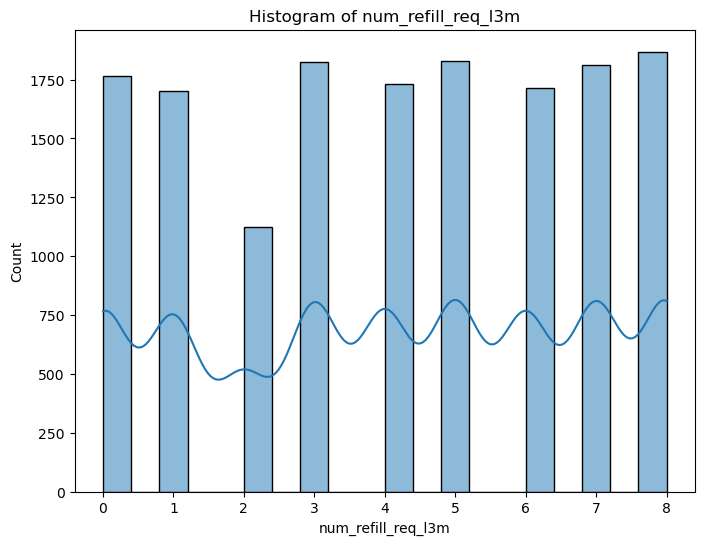

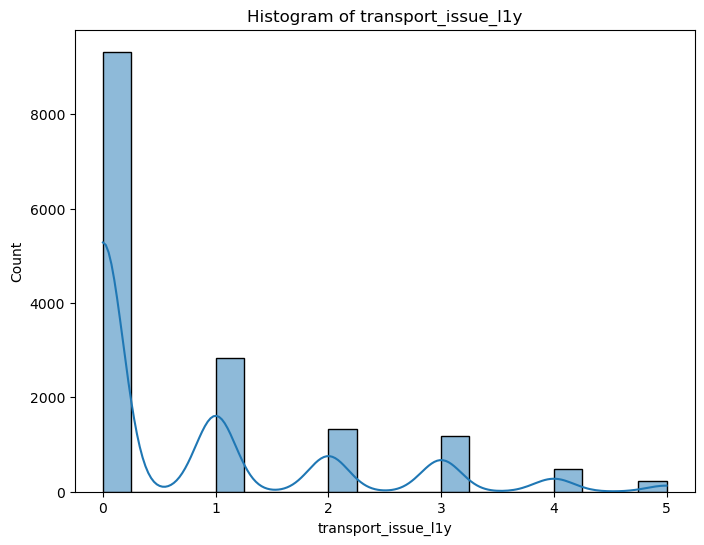

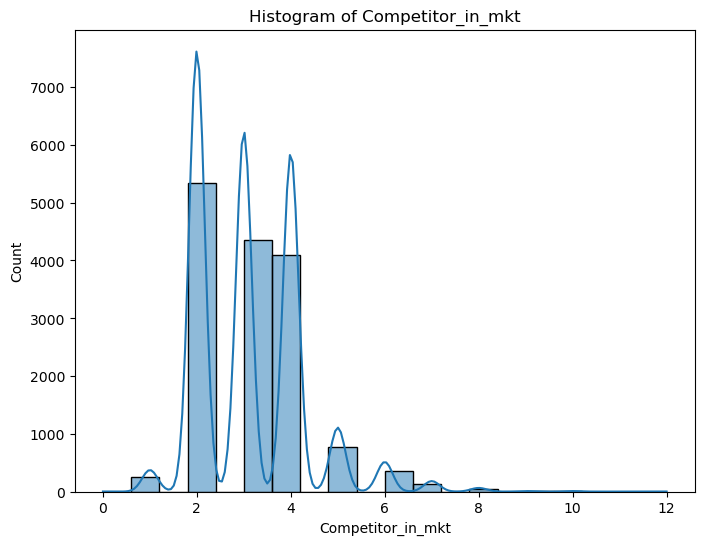

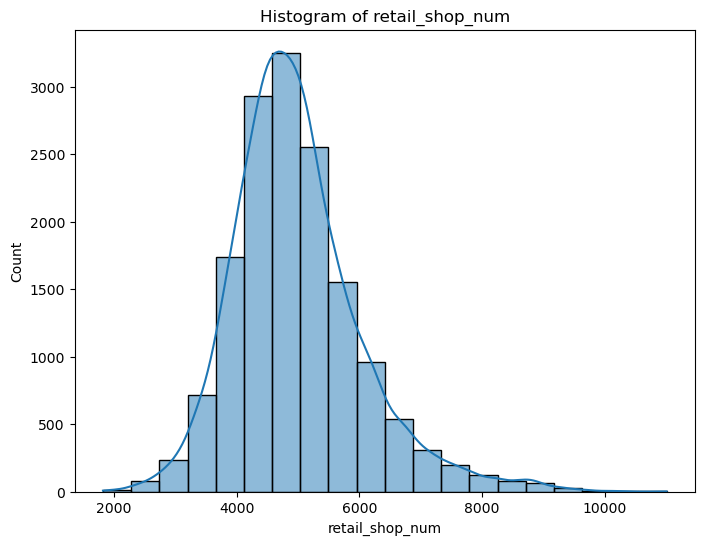

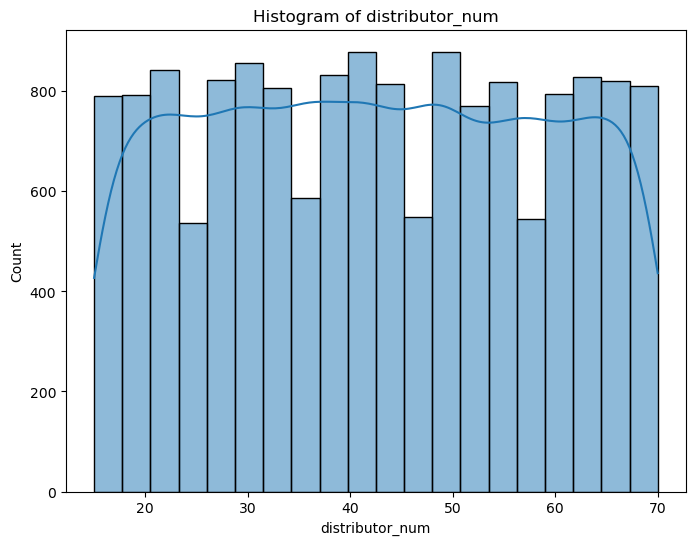

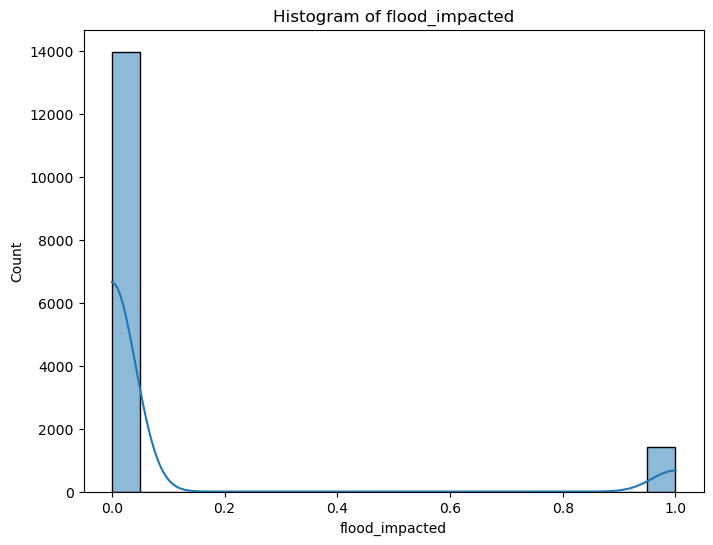

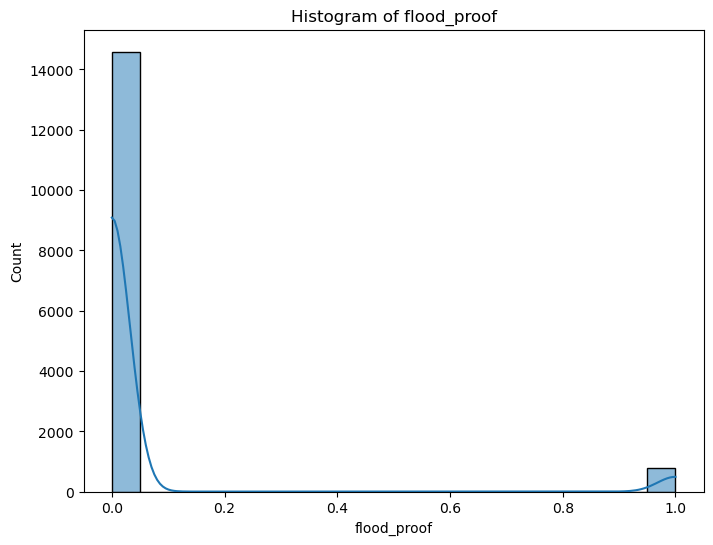

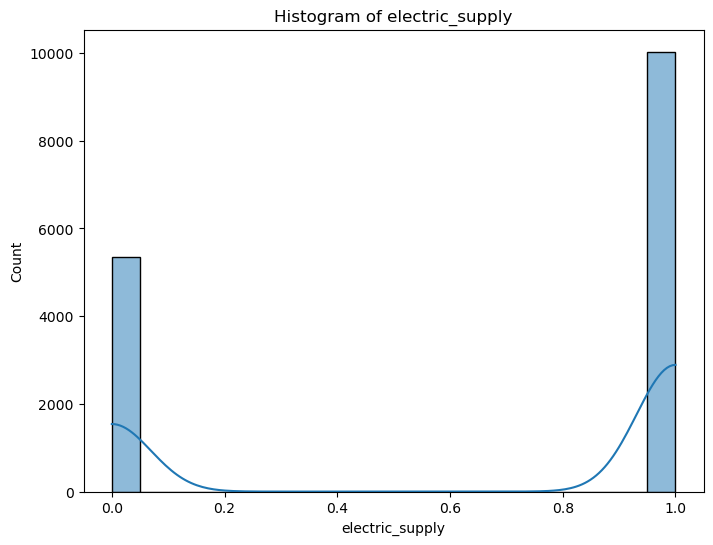

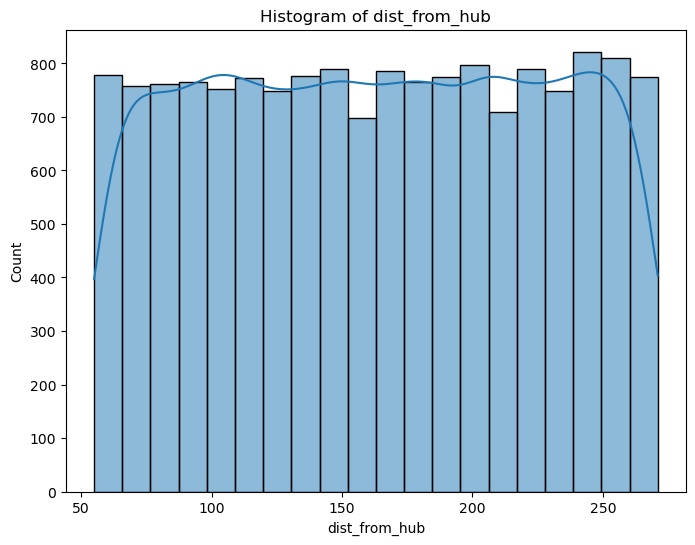

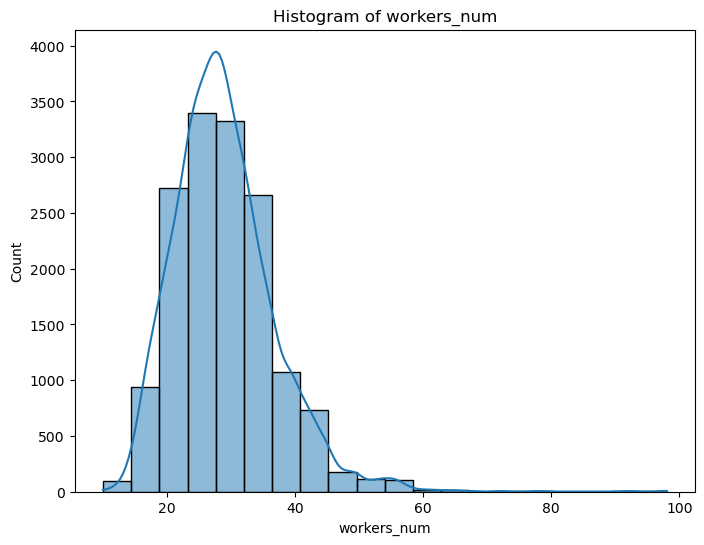

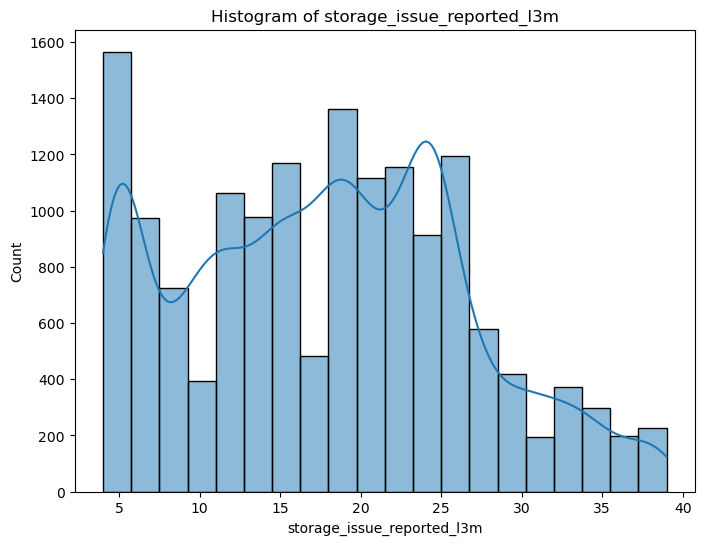

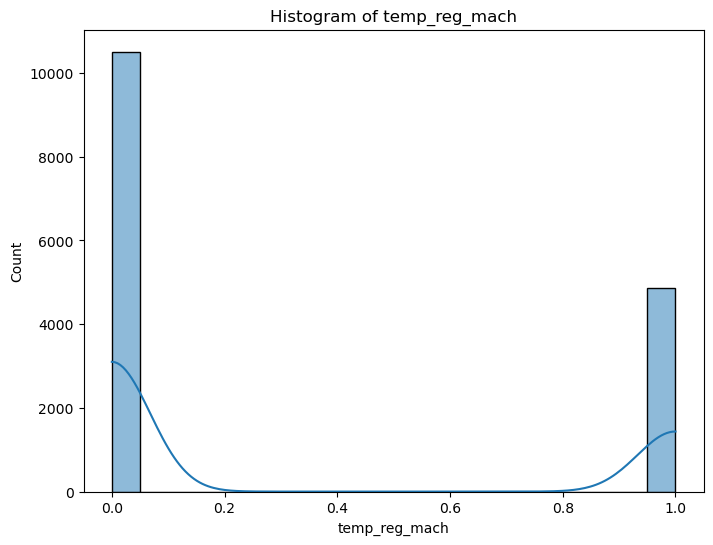

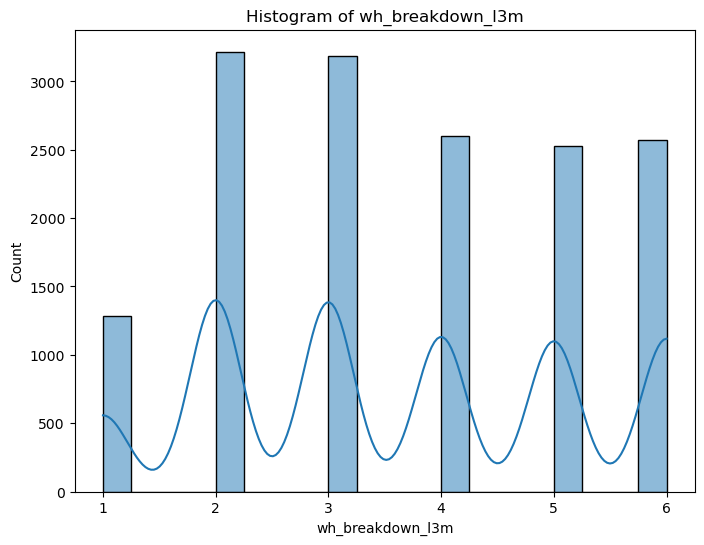

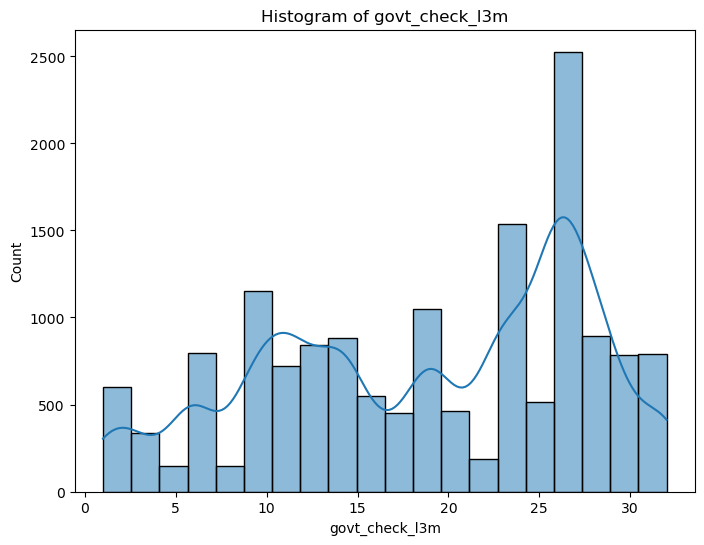

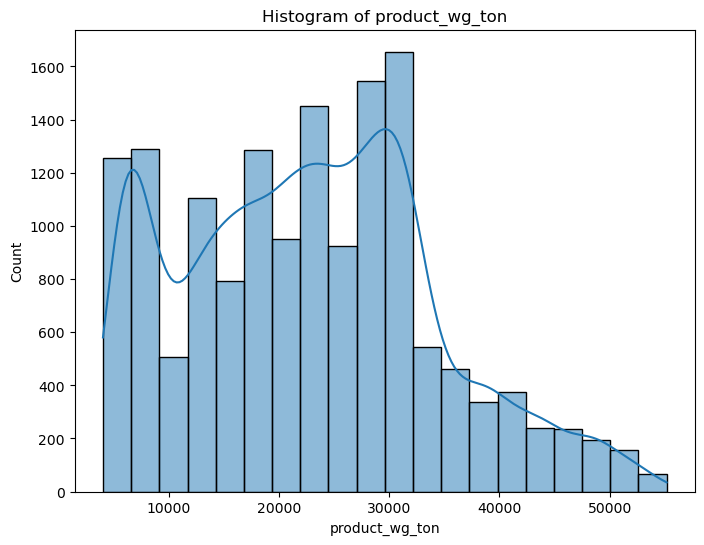

In [378]:
#univeriate analysis- Histogram for numeric columns
numeric_columns=train_data_cleaned.select_dtypes(include=['int64','float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(train_data_cleaned[column],bins=20,kde=True)
    plt.title(f"Histogram of {column}")
    plt.show()

### Insights:
> It seems greater percentage of warehouses has always encountering refill requests.
> More than 9000 warehouses has no transport issued for them.
> Presence of competitors well seen in the market. most of warehouses has competitors in the range of 2-4.
> More than 5000 warehouses has greater number of retail shops who sell noodles (>5000).
> On an average of 42 distributers are there for warehouses.
> Very less percentage of warehouses are in the area of flood impacted.
> Very less percentage of warehouses has flood proof indicator.
> More than 5000 warehouses has no electric supply along with some power backup.
> Average distance from  warehouse to production hub is 163m.(i have considered in meters as it is not mentioned).
> Very less percentage of warehouses has more than 50 workers.
> Average of 17 times storage issue is reported in every warehouses.
> Greater percentage of warehouses has no temperature regulating machine indicator.
> Average of 3 times the warehouse faces the breakdown in the last 3 months.



In [379]:
train_data_cleaned["wh_breakdown_l3m"].mean()

3.6230649147912057

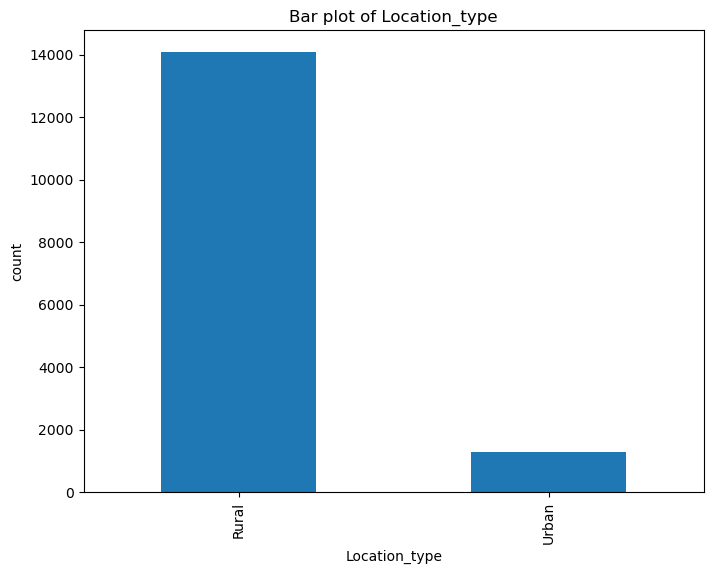

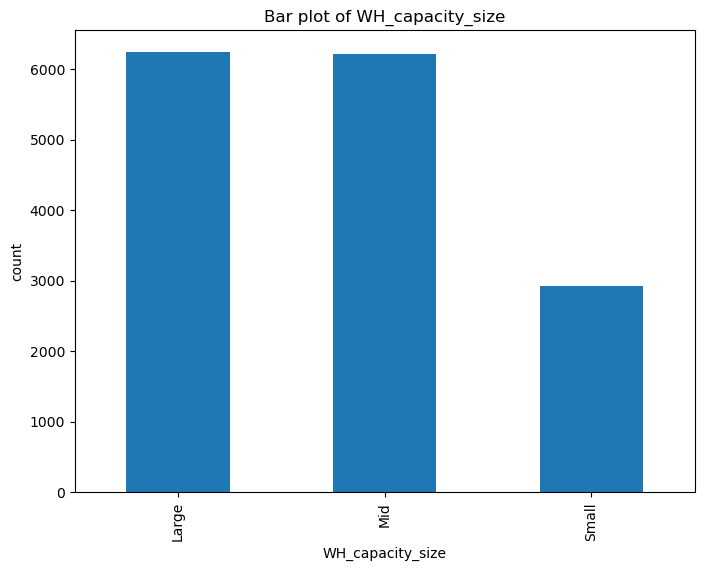

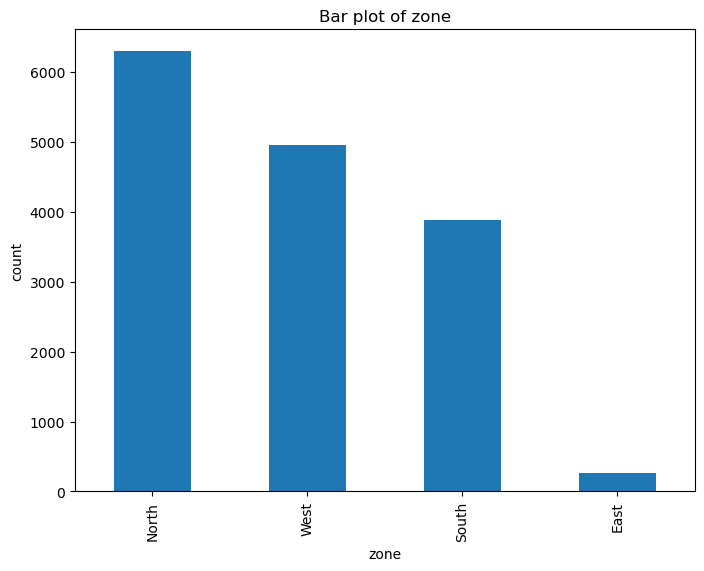

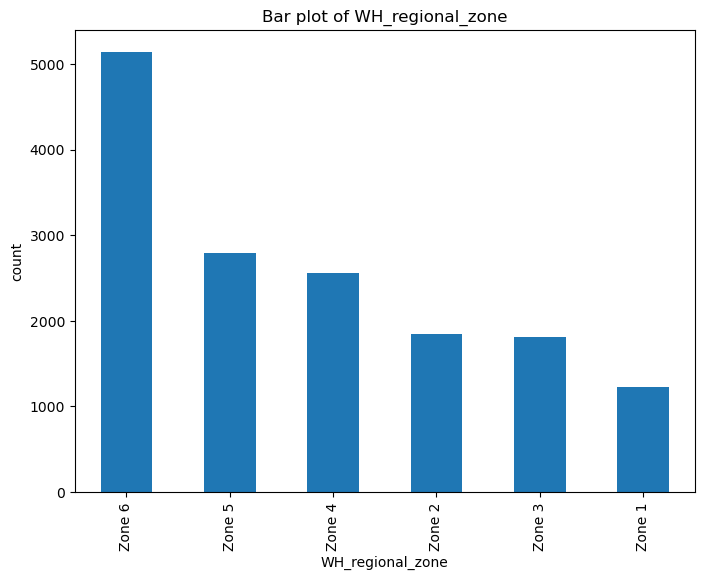

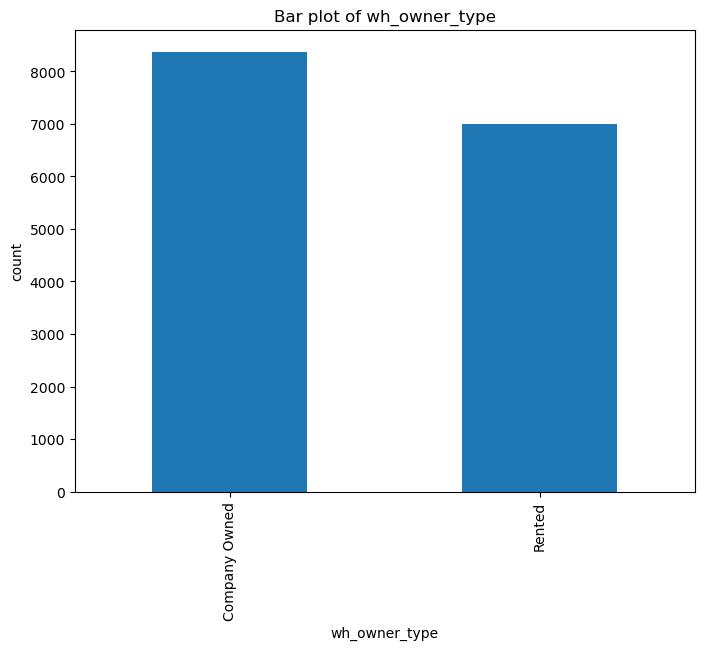

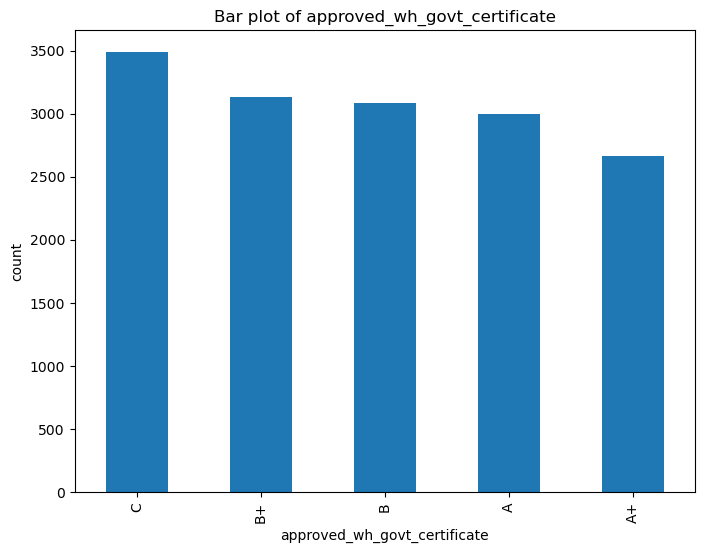

In [380]:
#Univarite analysis - Bar plot for categorical columns
categorical_columns=train_data_cleaned.select_dtypes(include=['object']).columns
id_cols=['Ware_house_ID','WH_Manager_ID']
for column in categorical_columns:
    if column not in id_cols:  #id columns are unique
        value_counts=train_data_cleaned[column].value_counts()
        plt.figure(figsize=(8,6))
        value_counts.plot(kind='bar')
        plt.title(f"Bar plot of {column}")
        plt.xlabel(column)
        plt.ylabel("count")
        plt.show()

### Insights:
> Rural areas has greater number of warehouses compared to urban areas.
> Less than 3000 warehouse has small capacity size warehouse.
> Less than 500 warehoses are there in east zone.
> Greater percentage of warehouses is owned by company itself.
> Compared to othere grades, warehouses with  C approved government certificate is greater.

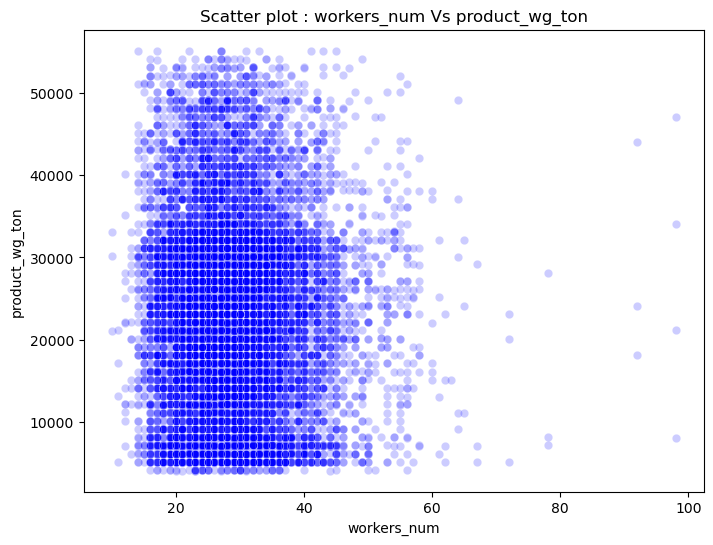

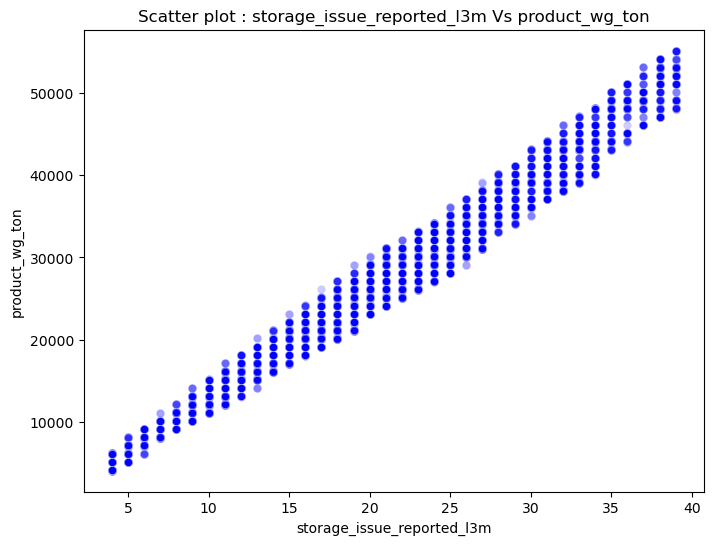

In [381]:
#Bivarite analysis-scatter plot for two numeric columns
numeric_columns=['workers_num','storage_issue_reported_l3m']
for column in numeric_columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=column,y='product_wg_ton',data=train_data_cleaned,c='blue',alpha=0.2)
    plt.title(f"Scatter plot : {column} Vs product_wg_ton")
    plt.show()

### Insights:
> The number of workers is not affecting the production.
> Greater the product weight ,greater storage issue reported

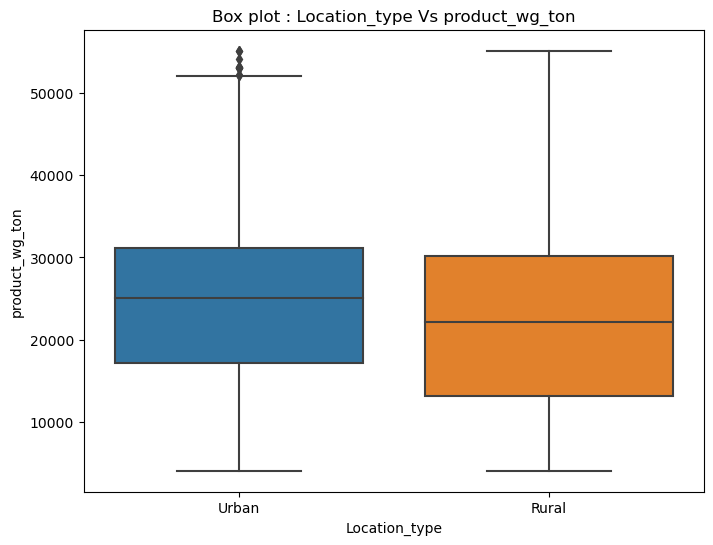

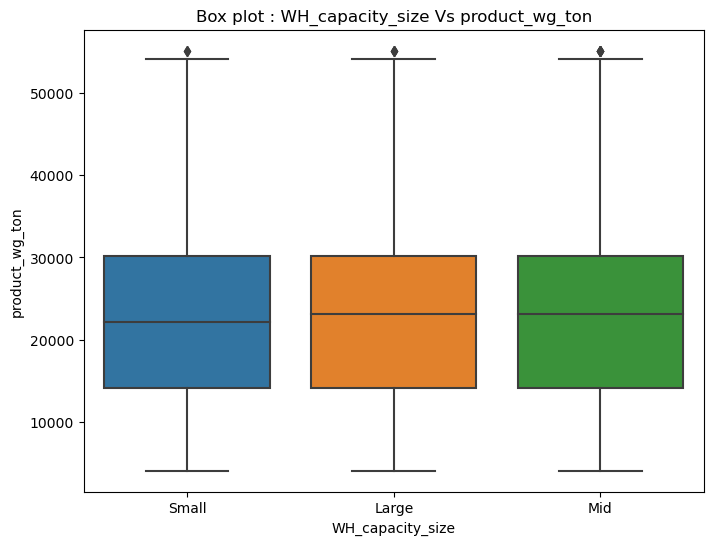

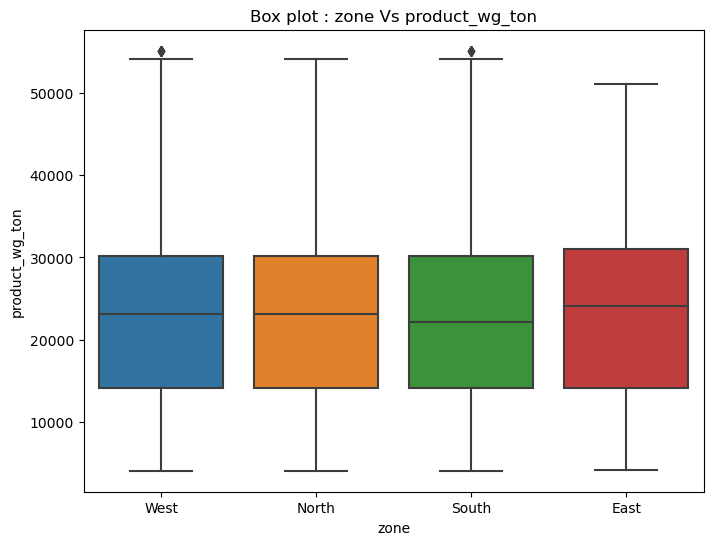

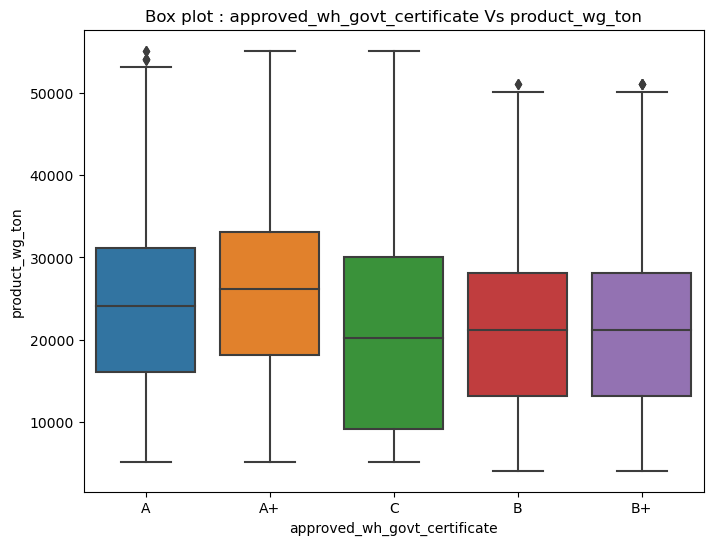

In [382]:
#Bivariate analysis - Box plot (categorical vs. target column)
categorical_columns=['Location_type','WH_capacity_size','zone','approved_wh_govt_certificate']
for column in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=column,y='product_wg_ton',data=train_data_cleaned)
    plt.title(f"Box plot : {column} Vs product_wg_ton")
    plt.show()

### Insights:
> Urban and rural areas has some what similar range of production.
> Warehouse capacity size not affecting product weight.
> East zone has some what greater product weight.
> Warehouses with A+ approved government certificate has somewhat greater production weight.

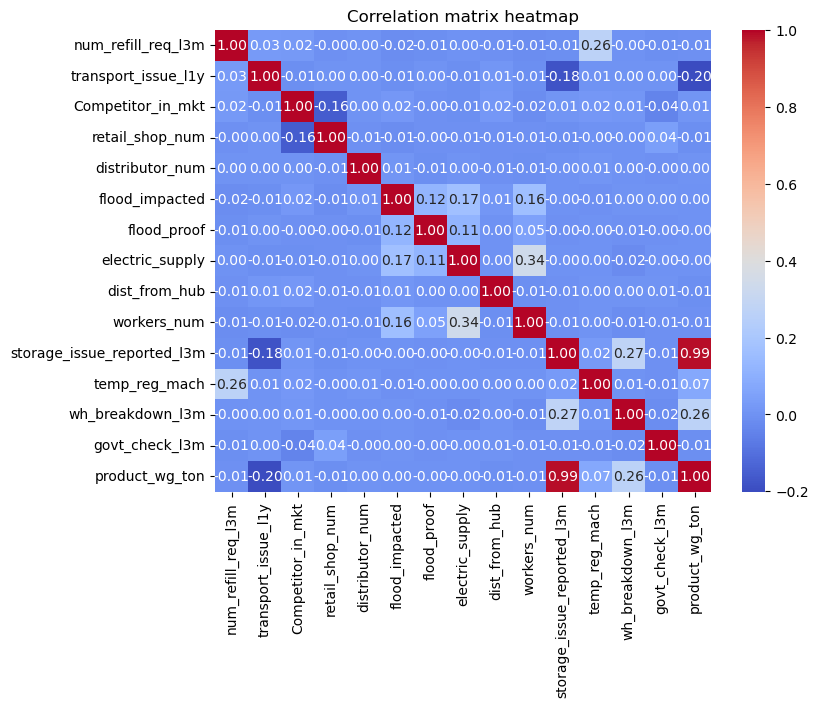

In [383]:
#Correlation analysis to identify the relationships between numeric variables
numeric_columns=['num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num',
                 'flood_impacted','flood_proof','electric_supply','dist_from_hub','workers_num',
                 'storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m','govt_check_l3m','product_wg_ton']
numeric_data=train_data_cleaned[numeric_columns]
correlation_matrix=numeric_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation matrix heatmap')
plt.show()
                 
   

Every variable is positively correlated to one another. Very less percentage of negative correlation is seen.

## ENCODING CATEGORICAL COLUMNS  IN TRAIN DATASETS

In [399]:
categorical_columns=train_data_cleaned.select_dtypes(include=['object']).columns
encoding_dict={}   #initialise a dictionary to store encodings
for column in categorical_columns:
    le=LabelEncoder()
    train_data_cleaned[column]=le.fit_transform(train_data_cleaned[column])
    encoding_dict[column]=dict(zip(le.classes_,le.transform(le.classes_)))   #saving the encoding mapping in the dictionary
with open('encoding_dict.pkl','wb') as f:   #save encoding dictionary to a pickle file
    pickle.dump(encoding_dict,f)
train_data_cleaned.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,2,3,5,3,1,2,4651,...,1,1,91,29.0,13,0,0,5,15,17115
1,1,1,0,0,1,4,0,0,4,6217,...,0,1,210,31.0,4,0,0,3,17,5074
2,2,2,0,1,2,1,1,0,4,4306,...,0,0,161,37.0,17,0,0,6,22,23137
3,3,3,0,1,1,2,7,4,2,6000,...,0,0,103,21.0,17,1,1,3,27,22115
4,4,4,0,0,1,4,3,1,2,4740,...,0,1,112,25.0,18,0,4,6,24,24071


Categorical columns in training data sets is encoded to numerical values and stored in list.then this list is saved as a pickle file for later use in encoding validation dataset for maintaining consistency.

## MODEL IMPLEMENTATION AND EVALUATION

In [385]:
#Splitting Independent and Dependent Variable
X=train_data_cleaned.drop(['product_wg_ton'],axis=1)
y=train_data_cleaned['product_wg_ton']

In [386]:
#splitting train data sets for training (80%) and testing (20%)..[test data sets can be used for validation]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#displaying the shape of the training and testing sets
print("training set shape:",X_train.shape,y_train.shape)
print("testing set shape:",X_test.shape,y_test.shape)

training set shape: (12299, 22) (12299,)
testing set shape: (3075, 22) (3075,)


Training datasets is splitted into training and testing datasets using 80-20 rule. Separate validation data sets is used for validation.

### Linear Regression

In [402]:
linear_model=LinearRegression()  #initialising the Linear Regression model
linear_model.fit(X_train,y_train)  #training the model
linear_predictions=linear_model.predict(X_test) #make  predictions on test sets
linear_mse=mean_squared_error(y_test,linear_predictions) #evaluating the model
print(f"Linear Regression Mean Squared Error : {linear_mse}")


Linear Regression Mean Squared Error : 2012752.6826119076


### Random Forest Regressor

In [388]:
rf_model=RandomForestRegressor(random_state=42)  #initialising the random forest regressor model
rf_model.fit(X_train,y_train)  #training the model
rf_predictions=rf_model.predict(X_test) #make  predictions on test sets
rf_mse=mean_squared_error(y_test,rf_predictions) #evaluating the model
print(f"Random Forest Mean Squared Error : {rf_mse}")


Random Forest Mean Squared Error : 803065.1363841952


### Gradient Boosting Regressor

In [389]:
gb_model=GradientBoostingRegressor(random_state=42)  #initialising the Gradient boosting model
gb_model.fit(X_train,y_train)  #training the model
gb_predictions=gb_model.predict(X_test) #make  predictions on test sets
gb_mse=mean_squared_error(y_test,gb_predictions) #evaluating the model
print(f"Gradient Boosting Mean Squared Error : {gb_mse}")


Gradient Boosting Mean Squared Error : 728016.5120661926


### Support Vector Regressor (SVR)

In [390]:
#scaling the features for SVR
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
svr_model=SVR()  #initialising the SVR model
svr_model.fit(X_train_scaled,y_train)  #training the model
svr_predictions=svr_model.predict(X_test_scaled) #make  predictions on test sets
svr_mse=mean_squared_error(y_test,svr_predictions) #evaluating the model
print(f"SVR Mean Squared Error : {svr_mse}")


SVR Mean Squared Error : 128679351.1087904


### K-Nearest Neighbors (KNN)

In [391]:
knn_model=KNeighborsRegressor()  #initialising the KNN model
knn_model.fit(X_train,y_train)  #training the model
knn_predictions=knn_model.predict(X_test) #make  predictions on test sets
knn_mse=mean_squared_error(y_test,knn_predictions) #evaluating the model
print(f"KNN Mean Squared Error : {knn_mse}")


KNN Mean Squared Error : 155986890.44018212


From model implementation and evaluation using training datasets,its seen that Gradient Boosting Regressor has less mean squared error compared to others. so its will be best model for the problem.

 ## VALIDATION DATA ENCODING

In [392]:
with open('encoding_dict.pkl','rb') as f:  #loading the encoding dictionary from the pickle file
    encoding_dict=pickle.load(f)
for column in categorical_columns:
    val_data[column]=val_data[column].map(encoding_dict[column])  #applying encoding to test data
val_data.head()


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,NaN,NaN,0,0,1,4,5,0,3,...,0,156,30.0,2006.0,24,0,0.0,2,5,30132
1,16622,NaN,NaN,0,0,1,4,5,0,2,...,1,79,31.0,2019.0,5,1,4.0,2,24,6075
2,16623,NaN,NaN,0,2,1,5,3,0,3,...,1,70,41.0,2008.0,19,1,1.0,5,9,24076
3,16624,NaN,NaN,0,1,3,3,5,2,2,...,1,255,33.0,2017.0,9,1,1.0,3,11,13092
4,16625,NaN,NaN,1,1,1,3,6,0,4,...,0,205,20.0,1999.0,25,0,2.0,4,26,29071


In [393]:
val_data.drop(['Unnamed: 0','wh_est_year'], axis=1, inplace=True) 
val_data.fillna({'Ware_house_ID':0}, inplace=True)
val_data.fillna({'WH_Manager_ID':0}, inplace=True)
val_data.fillna({'workers_num':0}, inplace=True)
val_data.fillna({'approved_wh_govt_certificate':0}, inplace=True)


In [394]:
 val_data.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [395]:
val_data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0.0,0.0,0,0,1,4,5,0,3,5590,...,0,0,156,30.0,24,0,0.0,2,5,30132
1,0.0,0.0,0,0,1,4,5,0,2,5856,...,0,1,79,31.0,5,1,4.0,2,24,6075
2,0.0,0.0,0,2,1,5,3,0,3,4803,...,0,1,70,41.0,19,1,1.0,5,9,24076
3,0.0,0.0,0,1,3,3,5,2,2,4784,...,0,1,255,33.0,9,1,1.0,3,11,13092
4,0.0,0.0,1,1,1,3,6,0,4,3699,...,0,0,205,20.0,25,0,2.0,4,26,29071


While encoding validation datasets its seen there is more NaN values present in data.NaN values causes error while predicting. so its a need to change with default value like 0.

## EVALUATION USING VALIDATION DATA SETS

In [396]:
#Splitting Independent and Dependent Variable
X_val=val_data.drop(['product_wg_ton'],axis=1)
y_val=val_data['product_wg_ton']


In [404]:
#define the models
models=[linear_model,rf_model,gb_model,knn_model]
for model in models:
    p_val=model.predict(X_val)
    mse_val=mean_squared_error(y_val,p_val)
    model_score=model.score(X_val,y_val)
    print(f"\nModel:{model}")
    print(f"Validation MSE:{mse_val}")
    print(f" model score : {model_score}")
    
#for svr model use scaled features ,we used scaler object which used earlier for consistency
X_val_scaled=scaler.transform(X_val)
sp_val=svr_model.predict(X_val_scaled)
Smse_val=mean_squared_error(y_val,sp_val)
smodel_score=svr_model.score(X_val_scaled,y_val)
print(f"\nModel:SVR()")
print(f"Validation MSE:{Smse_val}")
print(f" model score : {smodel_score}")



Model:LinearRegression()
Validation MSE:3111806.03631093
 model score : 0.977051357121961

Model:RandomForestRegressor(random_state=42)
Validation MSE:1033172.3407758909
 model score : 0.9923806616468802

Model:GradientBoostingRegressor(random_state=42)
Validation MSE:963835.1045241004
 model score : 0.9928920031168579

Model:KNeighborsRegressor()
Validation MSE:159960233.45364442
 model score : -0.17965908844603695

Model:SVR()
Validation MSE:133290696.61008768
 model score : 0.017020804067781836


Upon validation,its seen that LinearRegression,RandomForestRegressor and GradientBoostingRegresson model has more than 0.90 model score.RandomForestRegressor and GradientBoostingRegresson has 0.99 model score.GradientBoostingRegresson model has less mean squared error compared to other models.

## CHARTS

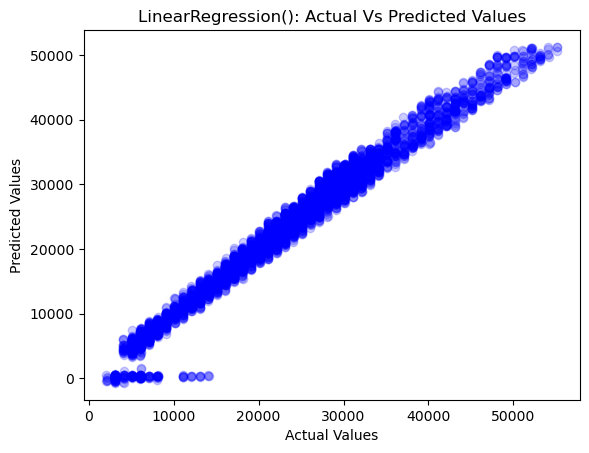

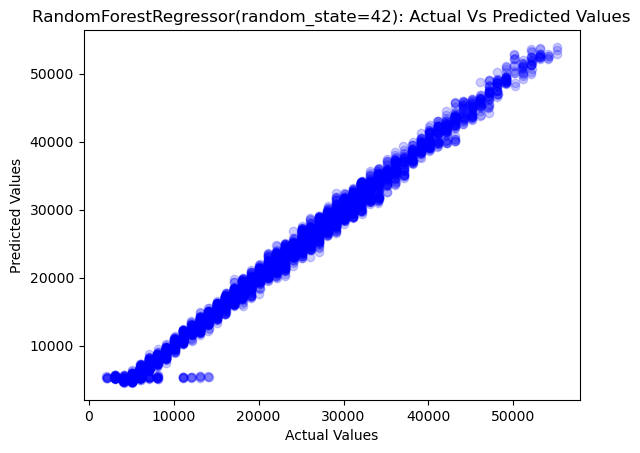

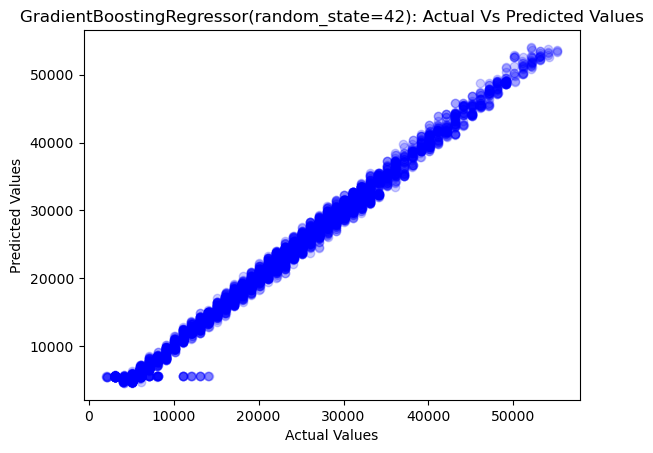

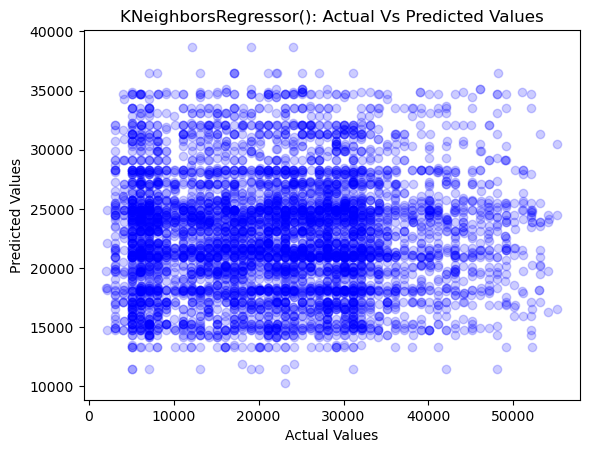

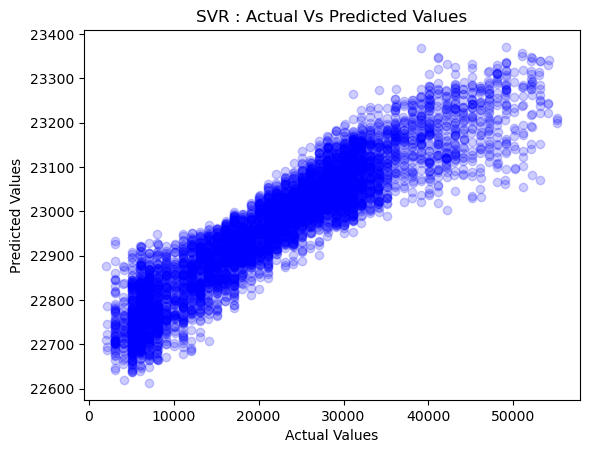

In [398]:
#visuslisations of predicted Vs actual values to evaluate the models performance
models=[linear_model,rf_model,gb_model,knn_model]
for model in models:
    p_val=model.predict(X_val)
    plt.scatter(y_val,p_val,c='blue',alpha=0.2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model}: Actual Vs Predicted Values")
    plt.show()
#for svr model use scaled features ,we used scaler object which used earlier for consistency
plt.scatter(y_val,sp_val,c='blue',alpha=0.2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR : Actual Vs Predicted Values")
plt.show()

Using charts also ,its seen LinearRegression,RandomForestRegressor and GradientBoostingRegresson models are performing very well compared to other two as it has less wider scatter points and some what straight line.

## CONCLUSION

RandomForestRegressor and GradientBoostingRegresson has 0.99 model score which indicate a high level of accuracy which indicates that the model explains 99% of the variability in the target variable.These models is performing well.however, its essential to consider other factors and metrics such as mean squared error.GradientBoostingRegresson model has less mean squared error compared to other models.so, its concluded that GradientBoostingRegresson model is best model for predicting product weight for production.

## NEXT STEPS AND IMPROVEMENTS

... Explore and create new features that might contribute to a better understanding ofthe demand-supply dynamics.

... Experiment with more advanced machine learning models or esemble methods which might capture more complex relationships in the data.

... Combine predictions from multiple models using esemble techniques like stacking or bagging.

... Explore different cross validation strategies to ensure the robustness of model evaluations.

... Perform a detailed analysis of prediction analysis.

... Consider integrating supplychain optimization techniques or algorithms to directly address the optimization aspects oth the problem.

... Collaborate with domain experts in supply chain management.

... Implement a system for continous monitoring and updating of the model.The supply chain environment may change over time, and a model that was effective initially may need periodic updates.